In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [460]:
#bring in the six packs
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')
testId = df_test.Id

In [461]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [462]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

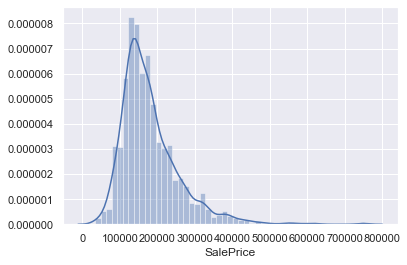

In [463]:
#histogram
sns.distplot(df_train['SalePrice']);

In [464]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


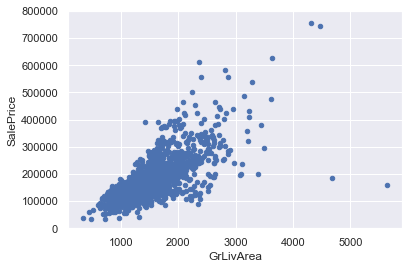

In [465]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


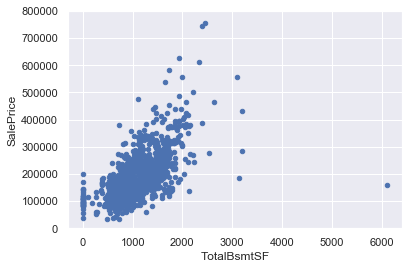

In [466]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

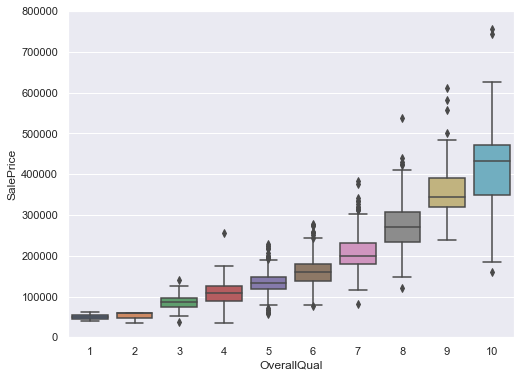

In [467]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

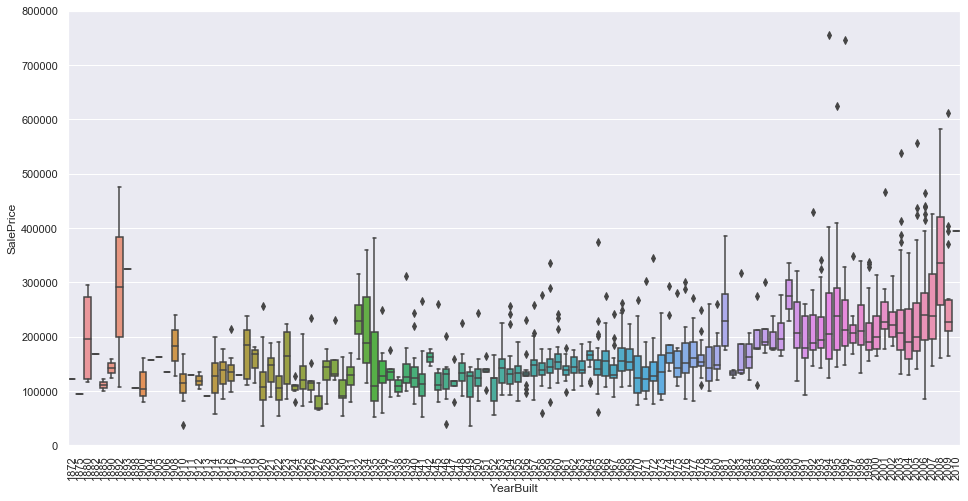

In [468]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

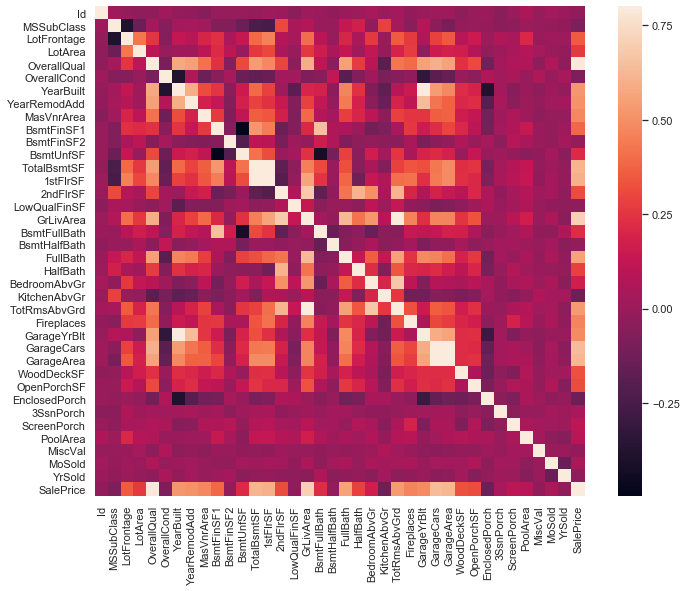

In [469]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

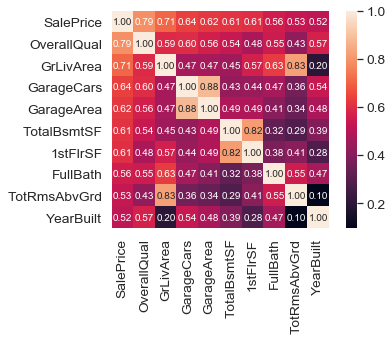

In [470]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

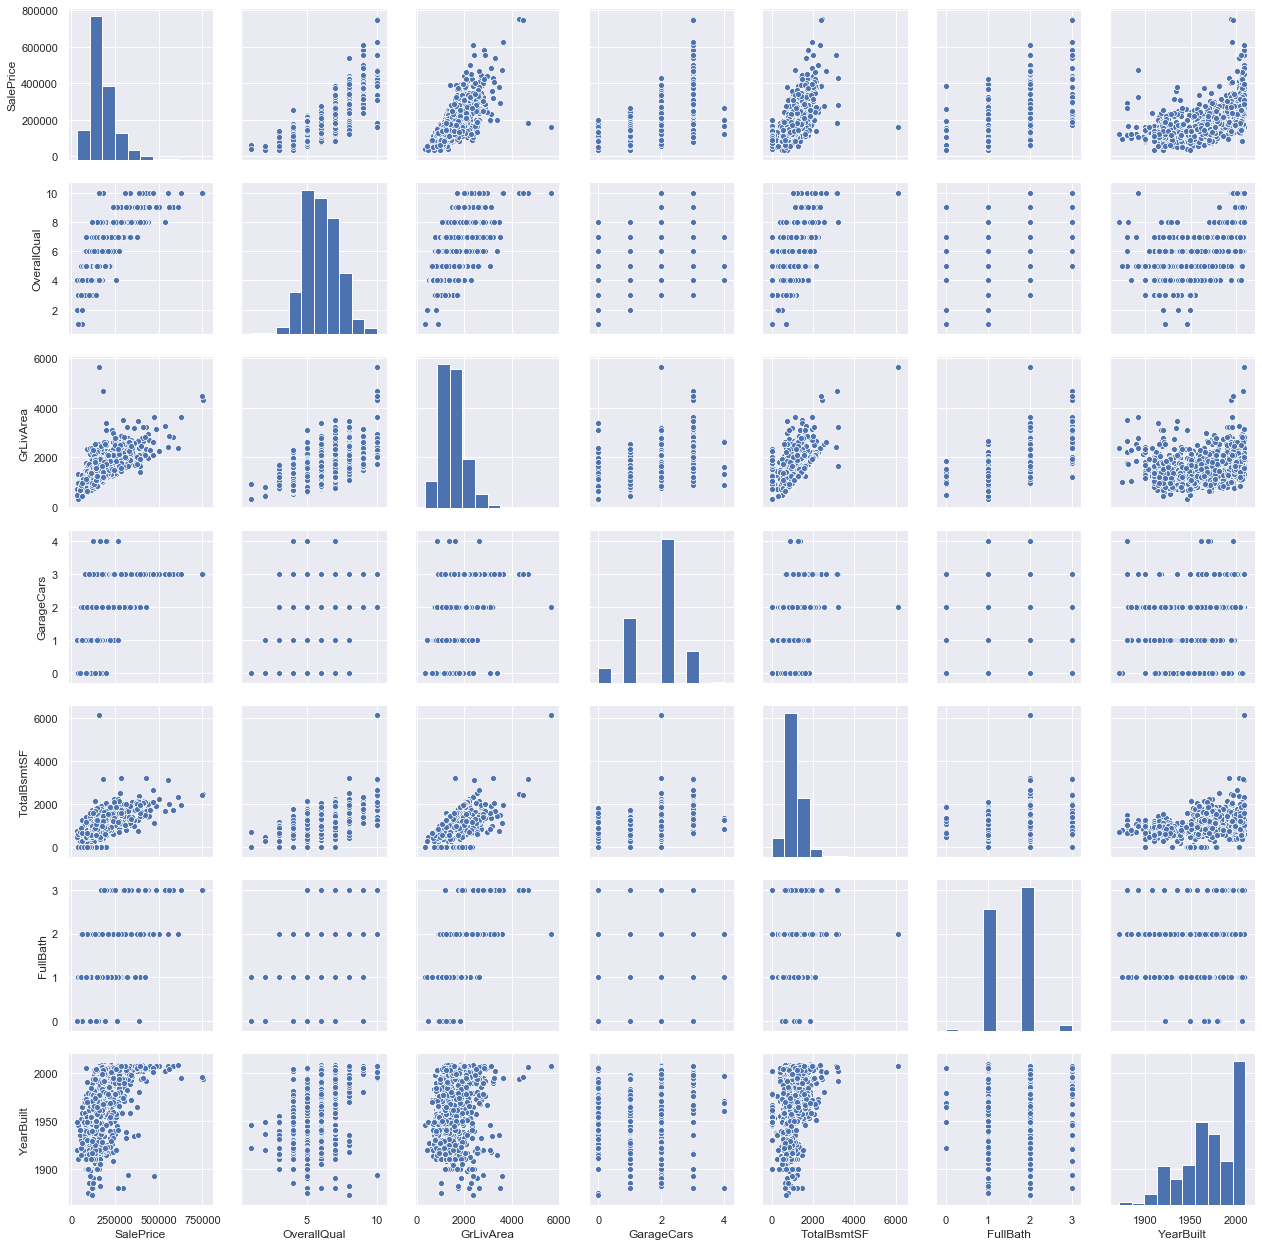

In [471]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [472]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [473]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [474]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


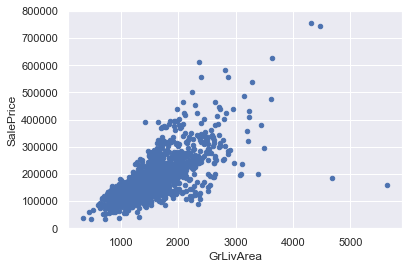

In [475]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [476]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


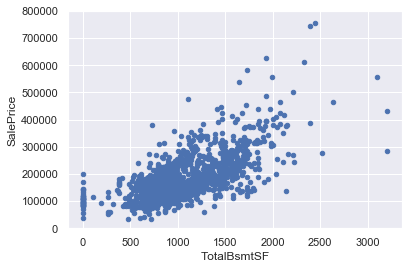

In [477]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

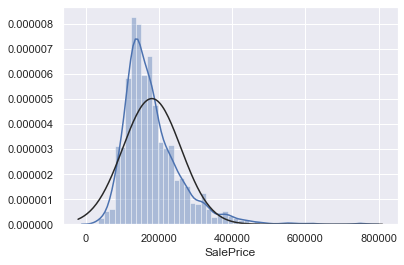

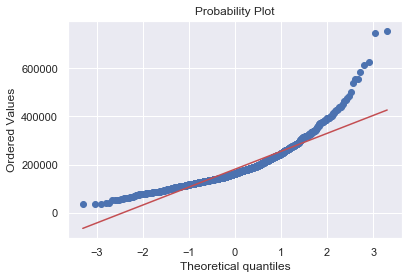

In [478]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit= norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [479]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

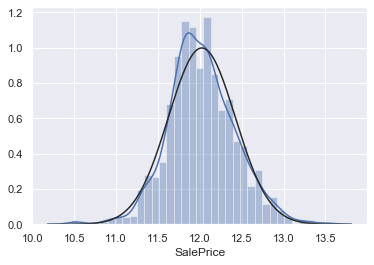

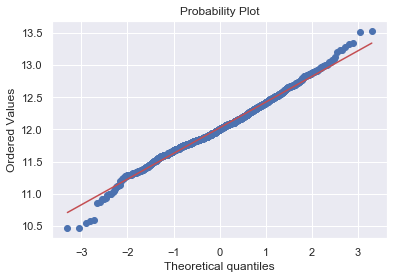

In [480]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

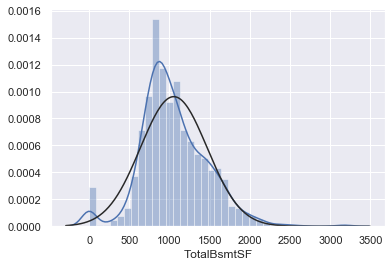

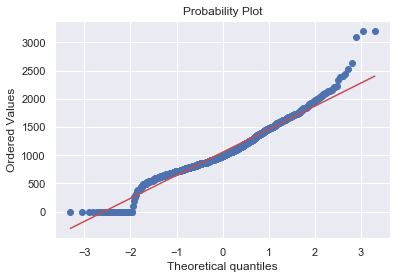

In [481]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [482]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [483]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

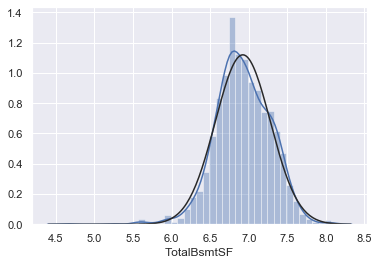

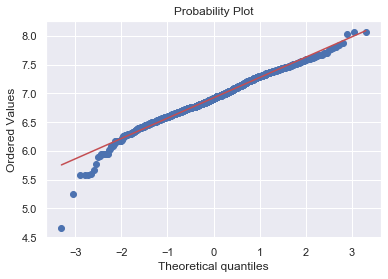

In [484]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

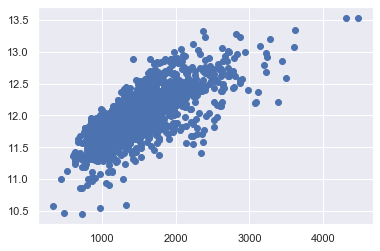

In [485]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

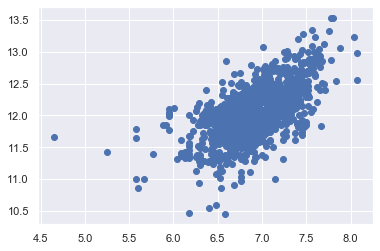

In [486]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [487]:
df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF']

0       6.752270
1       7.140453
2       6.824374
3       6.628041
4       7.043160
5       6.679599
6       7.430114
7       7.009409
8       6.858565
9       6.898715
10      6.946976
11      7.069023
12      6.815640
13      7.309212
14      7.133296
15      6.723832
16      6.911747
18      7.015712
19      6.936343
20      7.054450
21      6.456770
22      7.482682
23      6.946976
24      6.966024
25      7.356280
26      6.802395
27      7.440734
28      7.302496
29      6.253829
30      6.475433
          ...   
1430    6.595781
1431    6.864848
1432    6.486161
1433    6.841615
1434    7.026427
1435    7.184629
1436    6.761573
1437    7.566311
1438    6.815640
1439    6.289716
1440    6.376727
1441    6.742881
1442    6.924612
1443    6.858565
1444    7.259820
1445    6.701960
1446    7.080026
1447    7.106606
1448    6.327937
1449    6.445720
1450    6.797940
1451    7.360740
1452    6.304449
1453    7.038784
1454    7.107425
1455    6.859615
1456    7.340836
1457    7.0492

In [488]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [489]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [490]:
df_train['TotalBsmtSF'] =  df_train['1stFlrSF'] + df_train['2ndFlrSF']

In [491]:
Y = df_train.SalePrice
X = df_train[{"OverallQual", "TotalBsmtSF", "GrLivArea"}]

In [492]:
X_train, Y_train, X_test, Y_test = train_test_split(X,Y,test_size = 0.3)

In [493]:
# errors = []
# n_estimators = [5,15,50,100,250,500,1000]
# for n in n_estimators:
#     RFR = RandomForestRegressor(n_estimators = n,max_features=3)
#     errors.append(cross_val_score(RFR,X,Y, cv = 5).mean())

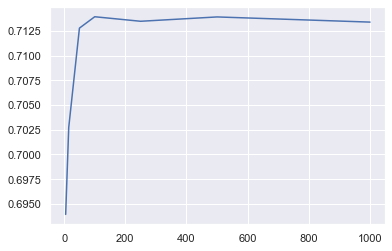

In [494]:
# plt.plot(n_estimators,errors)

In [495]:
# errors

[0.6939388150637946,
 0.7027212204939783,
 0.7127684429610082,
 0.7139179902164908,
 0.713459946173066,
 0.7138989238732618,
 0.7133759116040419]

In [496]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators': [5,15,50,100,250,500,1000]}
# RFR = RandomForestRegressor()
# RFR_GRID = GridSearchCV(RFR, parameters, cv=3)
# RFR_GRID.fit(X, Y)

In [497]:
# RFR_GRID.best_params_

In [498]:
# RFR_GRID.best_score_

In [499]:
# RFR = RFR_GRID.best_estimator_


In [500]:
RFR = RandomForestRegressor(n_estimators = 1000, max_depth = 7)

In [515]:
Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [501]:
RFR.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [502]:
prediction = RFR.predict(X)
pd.concat([pd.DataFrame(prediction,columns = ["prediction"]), pd.DataFrame(Y)], names = ['prediction', 'real'], axis=1)

,prediction,SalePrice
0,12.124011,12.247694
1,11.977180,12.109011
2,12.232233,12.317167
3,12.136380,11.849398
4,12.557702,12.429216
5,11.787673,11.870600
6,12.492047,12.634603
7,12.349424,12.206073
8,12.196444,11.774520
9,11.768698,11.678440


In [503]:
#missing data
total = df_test[{"OverallQual", "TotalBsmtSF", "GrLivArea"}].isnull().sum().sort_values(ascending=False)
percent = (df_test[{"OverallQual", "TotalBsmtSF", "GrLivArea"}].isnull().sum()/df_test[{"OverallQual", "TotalBsmtSF", "GrLivArea"}].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TotalBsmtSF,1,0.000685
OverallQual,0,0.000000
GrLivArea,0,0.000000


In [504]:
df_test[df_test.TotalBsmtSF.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [505]:
df_test['TotalBsmtSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF']


In [506]:
df_test = df_test[{"OverallQual", "TotalBsmtSF", "GrLivArea"}]

In [521]:
test_predicton = np.exp(RFR.predict(df_test[{"OverallQual", "TotalBsmtSF", "GrLivArea"}]))

In [522]:
sub = pd.DataFrame()
sub['Id'] = testId
sub['SalePrice'] = test_predicton
sub.to_csv('submissionRandomForest.csv',index=False)

In [523]:
import xgboost as xgb


In [524]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [525]:
model_xgb.fit(X, Y)
xgb_pred = np.exp(model_xgb.predict(df_test))


In [526]:
sub = pd.DataFrame()
sub['Id'] = testId
sub['SalePrice'] = xgb_pred
sub.to_csv('submissionXGB.csv',index=False)